In [1]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy
# Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluation for model
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.loc[:,['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [10]:
total = df['Class'].count()
non_fraud = df['Class'].value_counts()[0]
fraud = total-non_fraud
non_fraud_percent = round(non_fraud/len(df)*100,2)
print('Non Fraud Transactions are ',non_fraud_percent,'% of the total data')
print('Total Non fraud Transactions are :',non_fraud)
print('Fraud Transaction Percent are ',round(fraud/total*100,2),'% of the data')
print('Total fraud transaction are :',fraud)

Non Fraud Transactions are  99.83 % of the total data
Total Non fraud Transactions are : 284315
Fraud Transaction Percent are  0.17 % of the data
Total fraud transaction are : 492


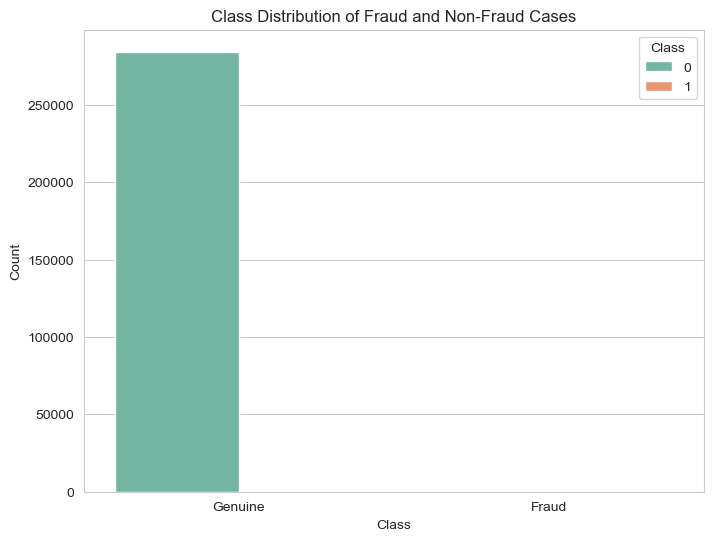

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Class', data=df, palette='Set2')
plt.xticks(range(2),['Genuine', 'Fraud'])
plt.title('Class Distribution of Fraud and Non-Fraud Cases')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

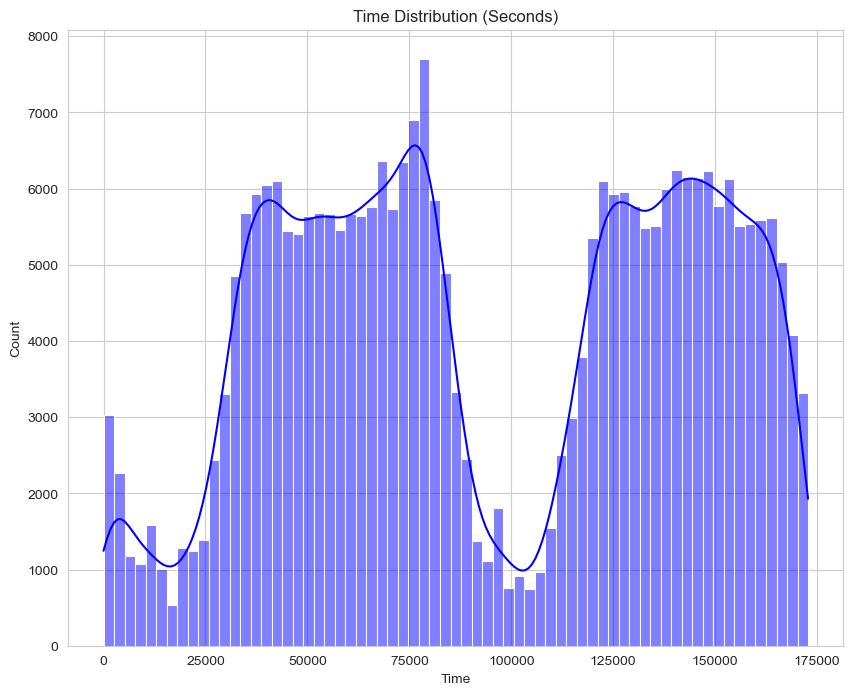

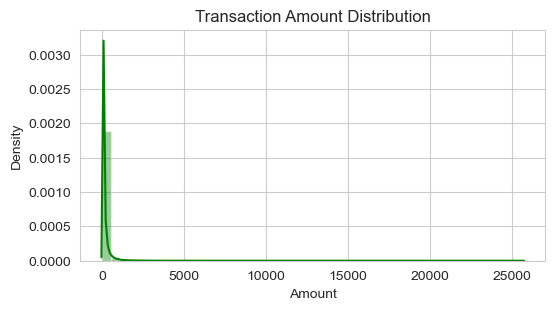

In [13]:
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.histplot(df['Time'], color='blue', kde=True)

plt.figure(figsize=(6,3),)
plt.title('Transaction Amount Distribution')
sns.distplot(df['Amount'],color='green',kde=True)

plt.show()

In [14]:
df = df.drop_duplicates()
sum(df.duplicated())

0

In [16]:
df.isnull().sum().any()

False

In [20]:
from sklearn.model_selection import train_test_split 
data=df.drop('Class',axis = 1)
target=df['Class']

X_trainval, X_test, y_trainval, y_test = train_test_split(data, target
                                                          , test_size=0.1
                                                          , stratify=df['Class'],
random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
                                                  , test_size=0.2
                                                  , stratify=y_trainval
                                                  , random_state=42)

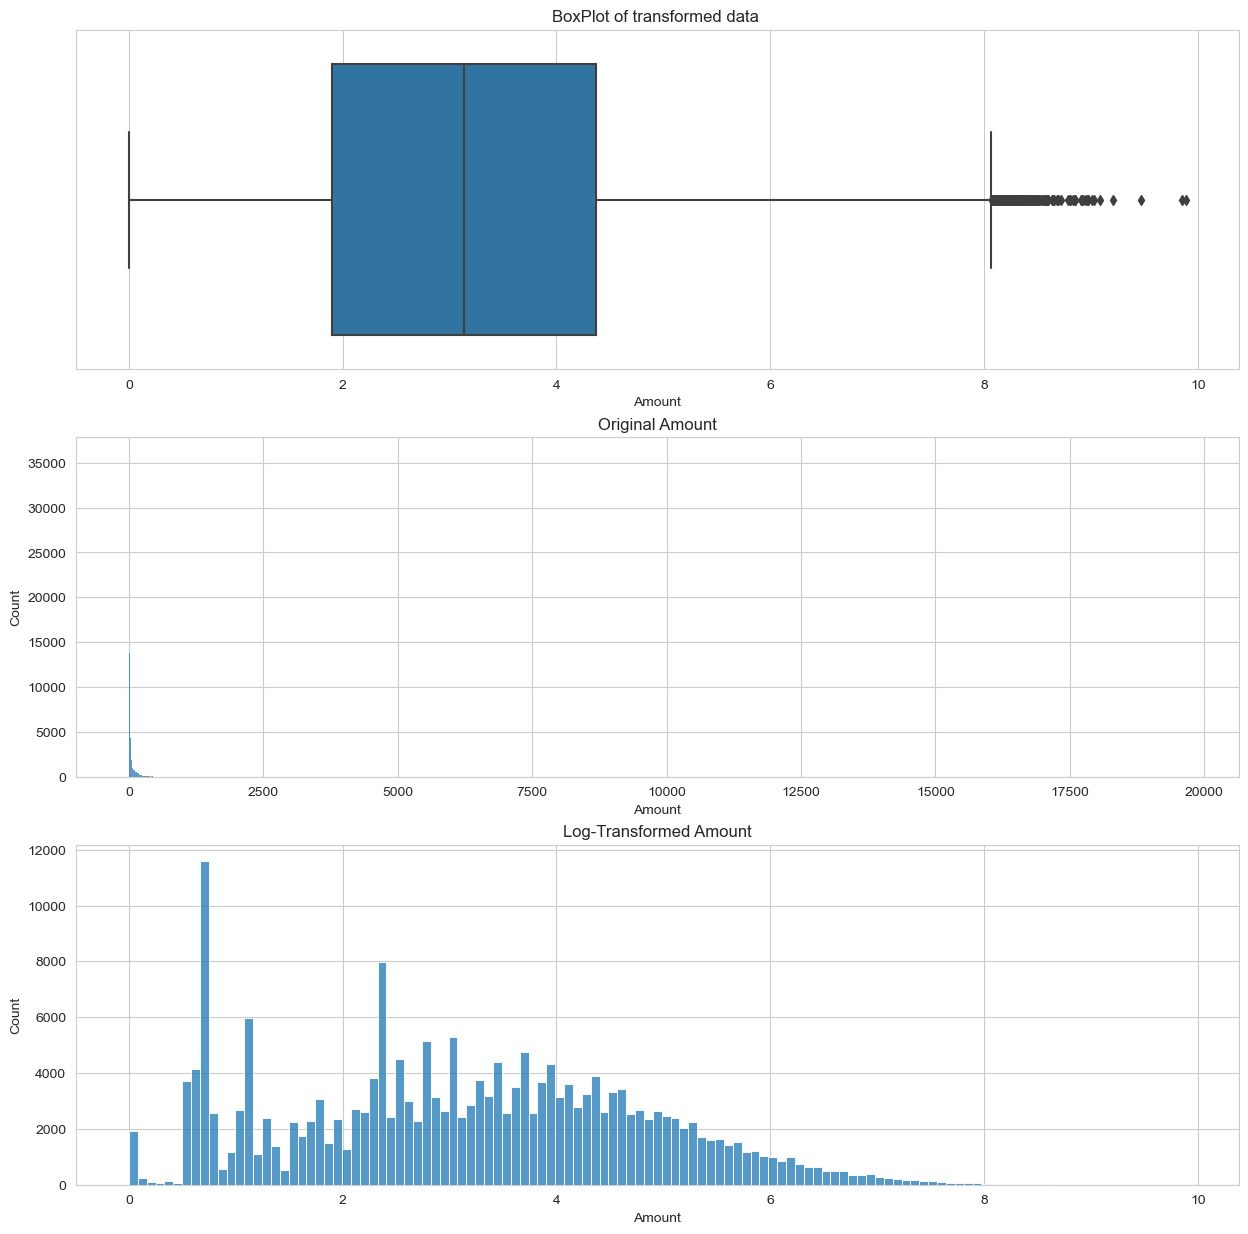

 Min: 0.0 Max: 9.88621574999957 
 mean: 3.156156058238998 std: 1.6579140614830497 
 median: 3.1354942159291497 
 mode: 0.6931471805599453


In [21]:
#using mathematical transformation for handling outlier by apply a logarithmic transformation to skewed data to make the distribution more symmetric
amount=X_train['Amount']
data = np.log1p(X_train['Amount'])
dada = data.sample(5000)

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.boxplot(x=data,ax=axes[0])
sns.histplot(data=df, x=amount, ax=axes[1])
sns.histplot(data=df, x=data, ax=axes[2])
axes[0].set_title('BoxPlot of transformed data ')
axes[1].set_title('Original Amount')
axes[2].set_title('Log-Transformed Amount')
plt.show()

print(' Min:',data.min(), 'Max:', data.max(), '\n mean:', data.mean(), 'std:', data.std(),'\n', 'median:', data.median(), '\n', 'mode:', data.mode()[0])

In [22]:
y_train = pd.DataFrame(y_train.values, columns=['Class'])
y_test = pd.DataFrame(y_test.values, columns=['Class'])
y_train['Class'].describe()

count    204282.000000
mean          0.001669
std           0.040823
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

 Min: 0.0 Max: 172792.0 
 mean: 94797.60169275805 std: 47448.07217143058 
 median: 84672.0 
 mode: 3770.0


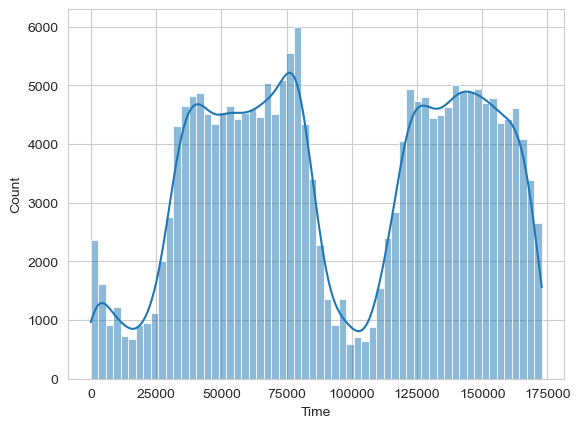

 Min: -56.407509631329 Max: 2.45492999121121 
 mean: 0.0023680992034809728 std: 1.9504832992183192 
 median: 0.017204633258555202 
 mode: 2.05579700630039


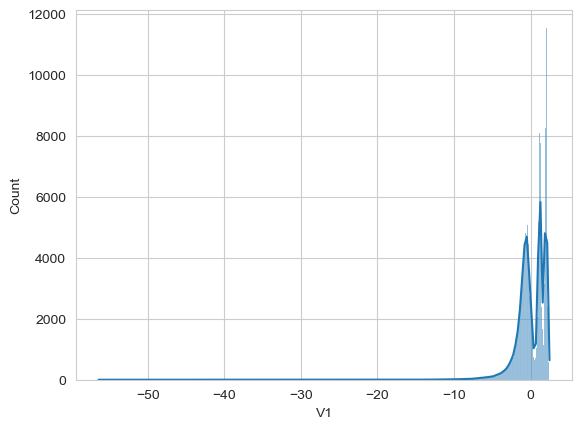

 Min: -72.7157275629303 Max: 22.0577289904909 
 mean: -0.0048759130681134384 std: 1.657871428476436 
 median: 0.064494641262695 
 mode: -0.32666777306077


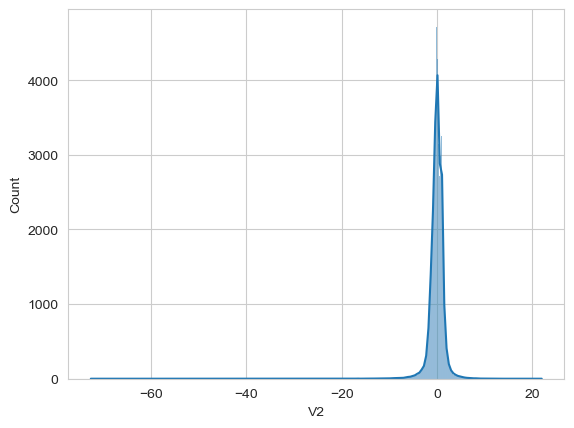

 Min: -33.6809840183525 Max: 9.38255843282114 
 mean: 0.0024915590655865847 std: 1.5082348556326295 
 median: 0.181056352962355 
 mode: -2.75204095570008


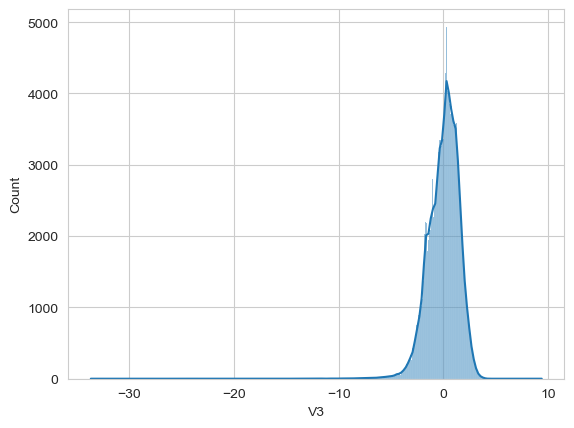

 Min: -5.68317119816995 Max: 16.8753440335975 
 mean: -0.002626987097926195 std: 1.416009913203214 
 median: -0.022761622287929252 
 mode: -0.842316033286871


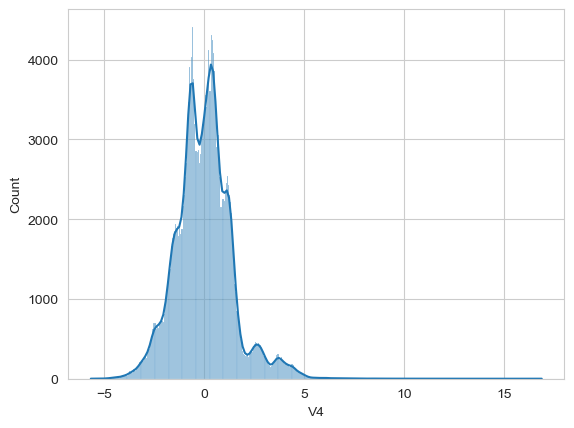

 Min: -42.1478983728015 Max: 34.8016658766686 
 mean: 0.003510637687619071 std: 1.364043361493047 
 median: -0.05383066542878455 
 mode: 2.46307225982454


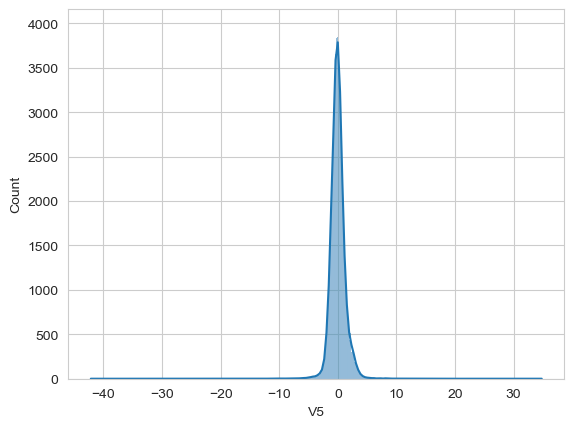

 Min: -26.1605059358433 Max: 22.5292984665587 
 mean: -0.00011326847597596365 std: 1.3282507987074321 
 median: -0.274869617171927 
 mode: 3.17385642307029


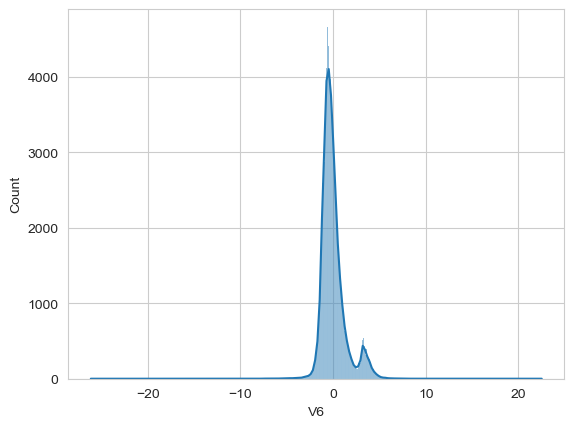

 Min: -43.5572415712451 Max: 36.8773682682598 
 mean: 0.001046986408269419 std: 1.2037850900793285 
 median: 0.04035303344583485 
 mode: -0.432125923987824


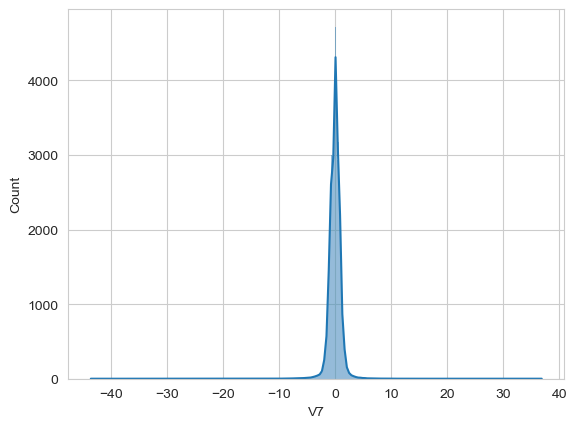

 Min: -50.9433688677023 Max: 20.0072083651213 
 mean: -0.0014460205156605007 std: 1.174958541821094 
 median: 0.02251882234372385 
 mode: 0.727706200727824


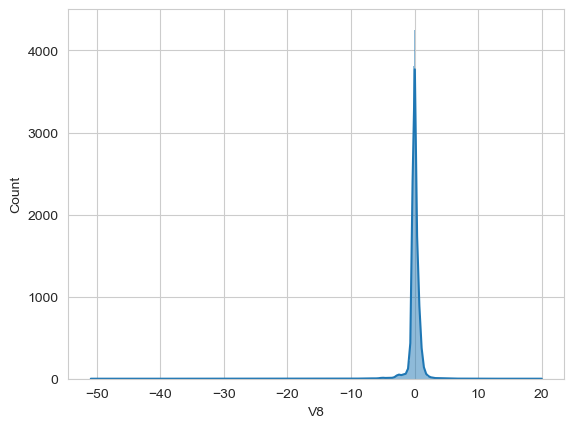

 Min: -13.3201546920984 Max: 15.5949946071278 
 mean: -0.0017437721270727566 std: 1.096510358840591 
 median: -0.0526305635500757 
 mode: 0.608605870267216


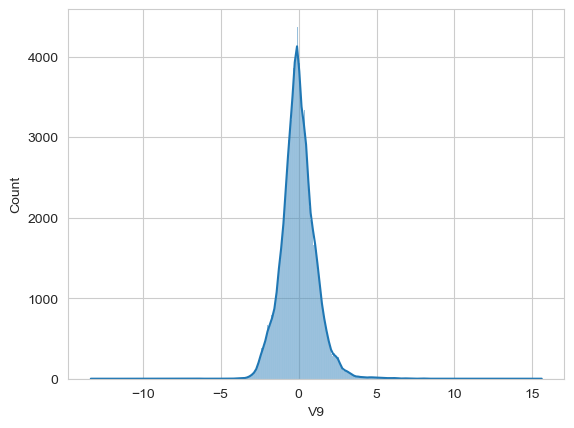

 Min: -24.5882624372475 Max: 23.7451361206545 
 mean: 3.6796223945122854e-05 std: 1.077990065276247 
 median: -0.09356866345422976 
 mode: -0.0751861699398929


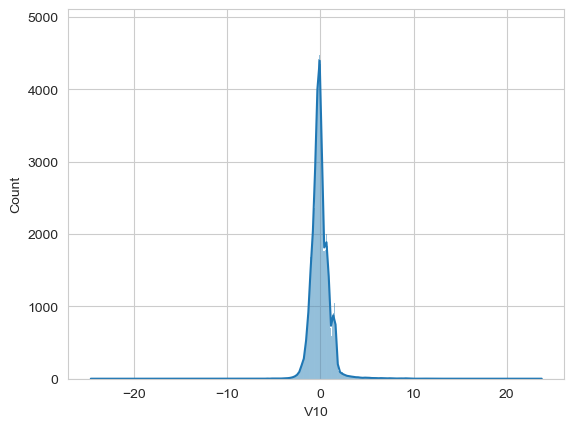

 Min: -4.79747346479757 Max: 11.6692047358121 
 mean: -8.728845921791257e-05 std: 1.0179321404236554 
 median: -0.03241462629534565 
 mode: 0.0635044576008839


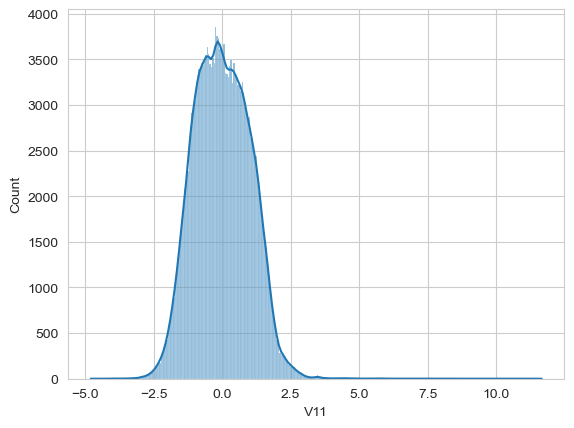

 Min: -17.2286622386187 Max: 4.84645240859009 
 mean: -0.0006740173753672886 std: 0.9921512719668788 
 median: 0.1372835514447575 
 mode: 0.350563573253678


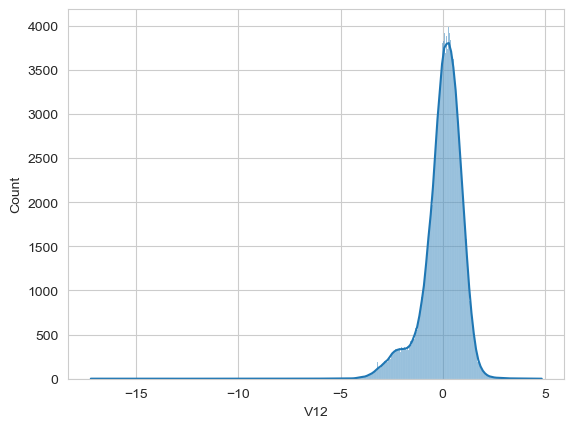

 Min: -4.00863979207158 Max: 4.56900895856606 
 mean: 0.00013908099771530548 std: 0.9947980769162375 
 median: -0.0125871096466331 
 mode: -0.141238322200309


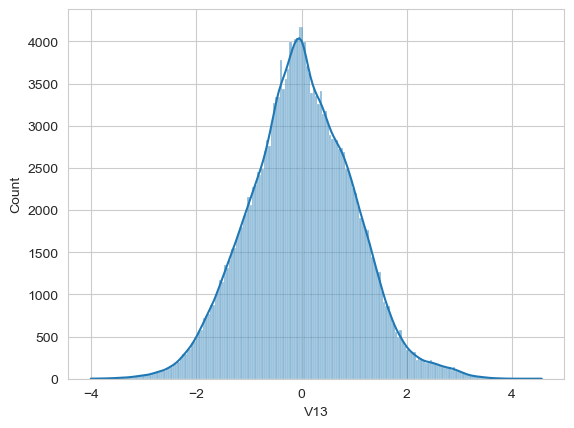

 Min: -18.4937733551053 Max: 7.75459874805484 
 mean: -0.0012148232749752321 std: 0.953465925871257 
 median: 0.0490698771939263 
 mode: 0.690971618395625


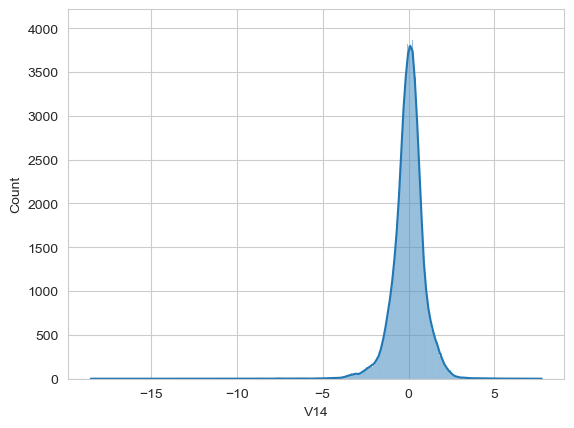

 Min: -4.49894467676621 Max: 5.78451388962946 
 mean: 0.0007487053392940551 std: 0.9153506628713566 
 median: 0.04874832632753435 
 mode: 1.2752570390935


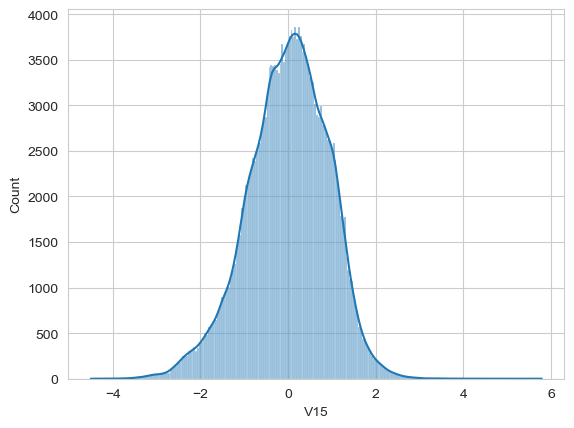

 Min: -14.1298545174931 Max: 8.28988955954619 
 mean: -0.0005393656703038932 std: 0.8719510890280001 
 median: 0.06545625811844119 
 mode: -0.371962125028419


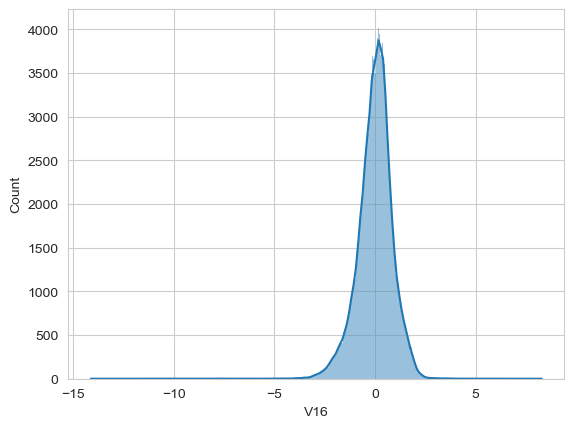

 Min: -25.1627993693248 Max: 9.25352625047285 
 mean: 0.0021713323956864396 std: 0.8393040343671101 
 median: -0.06353881862614835 
 mode: -0.601956802828445


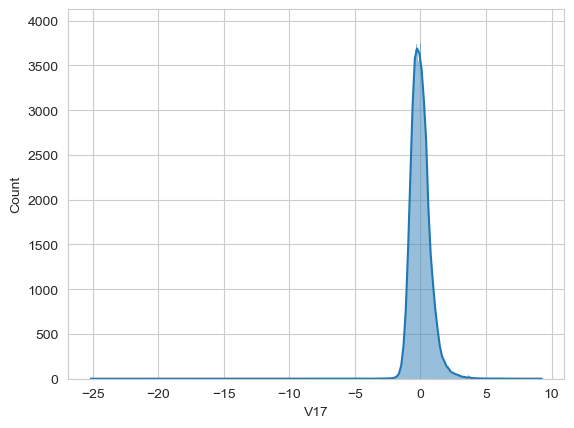

 Min: -9.49874592104677 Max: 5.04106918541184 
 mean: 0.0018490054915530785 std: 0.8378266912302007 
 median: -0.00164441915879105 
 mode: -0.0526401462570187


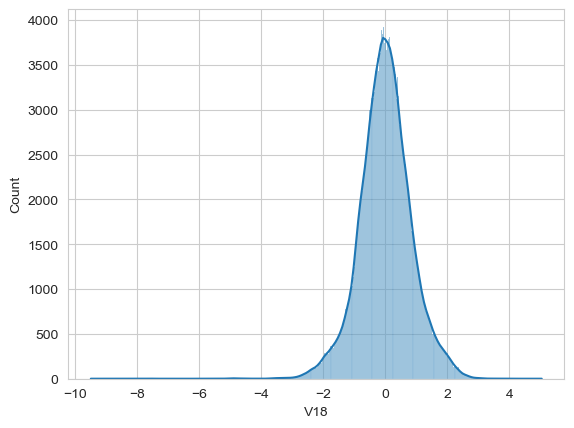

 Min: -7.21352743017759 Max: 5.57211332687969 
 mean: -0.00034122508354664694 std: 0.8127691238232784 
 median: 0.00287218219217335 
 mode: -0.330590448442944


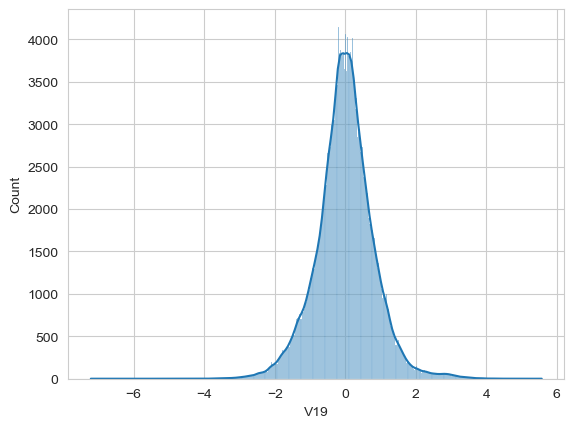

 Min: -28.009635333749 Max: 39.4209042482199 
 mean: 0.0009486223247071425 std: 0.7699865519512679 
 median: -0.062265844205246904 
 mode: -0.180370118559693


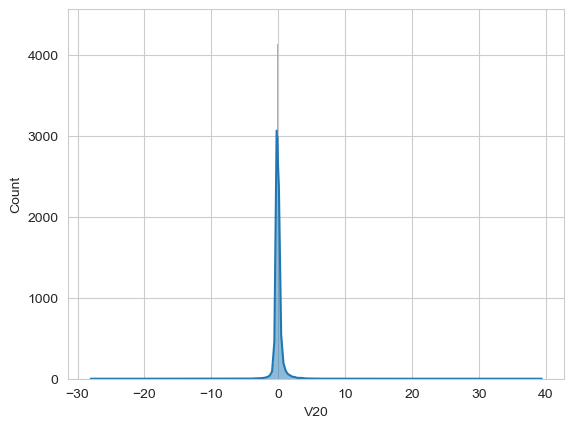

 Min: -22.889347040939 Max: 22.6148893676169 
 mean: 0.001964605832074592 std: 0.7301534953395418 
 median: -0.02909284329853955 
 mode: 0.269764951361357


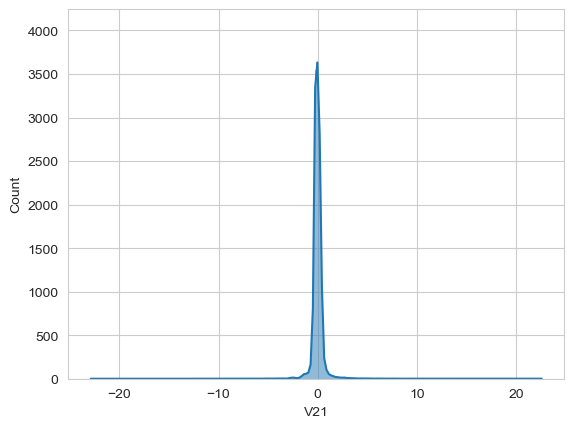

 Min: -10.933143697655 Max: 8.31627543891357 
 mean: 0.0013332501758800185 std: 0.7246260149517186 
 median: 0.0094847473640467 
 mode: 0.844626646775712


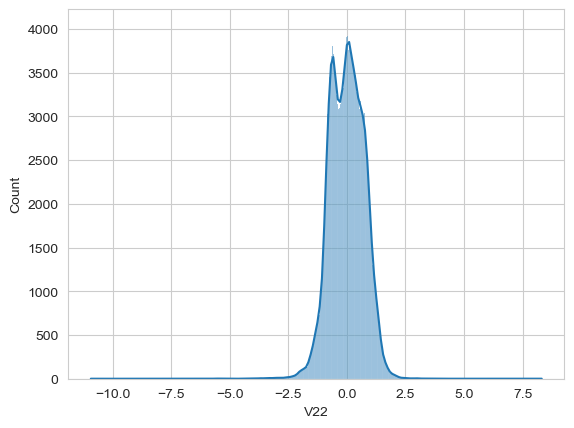

 Min: -36.666000066027 Max: 22.5284116897749 
 mean: 0.0002999677444401212 std: 0.6206583654490866 
 median: -0.0114445240786957 
 mode: 0.0206746676928111


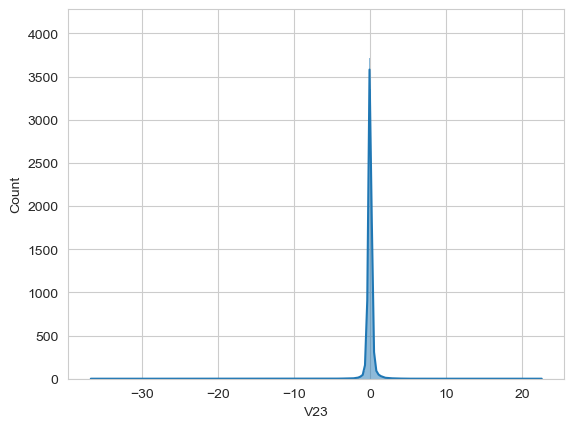

 Min: -2.83662691870341 Max: 4.01634181669268 
 mean: 0.001292812547869386 std: 0.6054210353489193 
 median: 0.0419738530377622 
 mode: 0.726211883811499


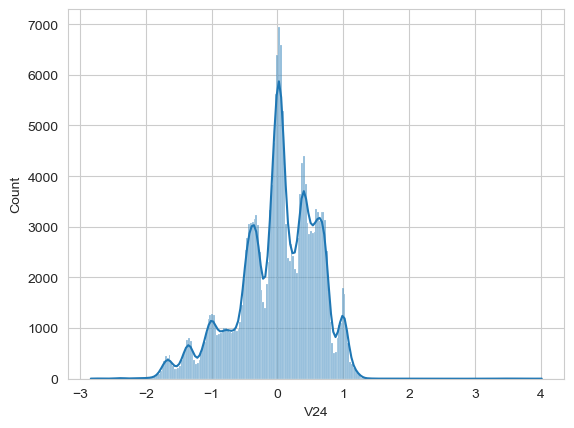

 Min: -8.69662677026752 Max: 7.51958867870916 
 mean: 0.0001101477022224808 std: 0.5215940634487176 
 median: 0.01736489678162565 
 mode: 0.366624307004913


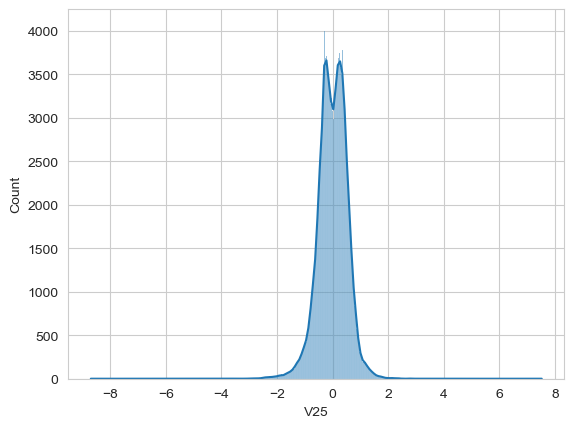

 Min: -2.60455055280817 Max: 3.5173456116238 
 mean: -0.00039465390719968627 std: 0.48118544044724143 
 median: -0.0531311146135836 
 mode: -0.398827514959463


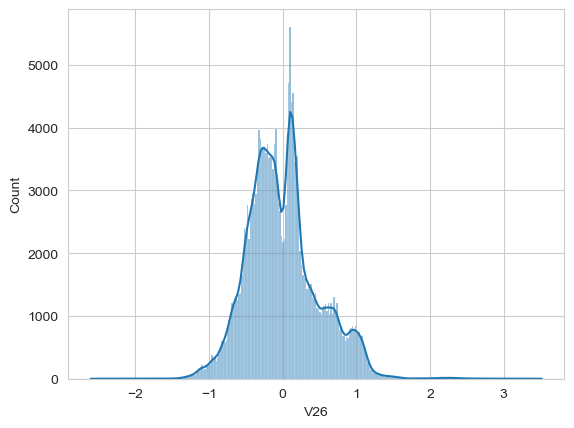

 Min: -22.5656793207827 Max: 11.1357398445742 
 mean: 0.0015245397971260335 std: 0.39393037915670226 
 median: 0.00149685758520825 
 mode: 0.0277351215052822


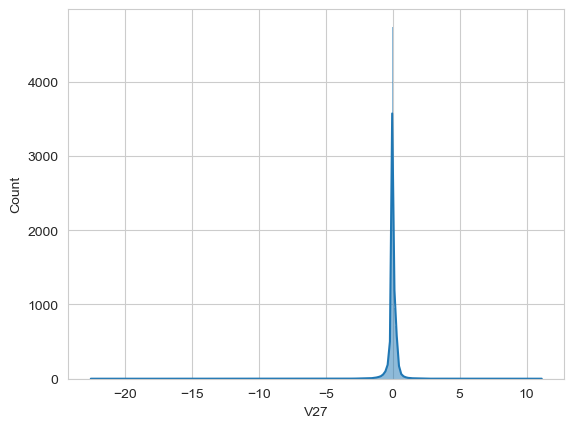

 Min: -11.7108956394515 Max: 33.8478078188831 
 mean: 0.0010347402740957148 std: 0.3322714120098506 
 median: 0.011420598899003799 
 mode: -0.0602821510762213


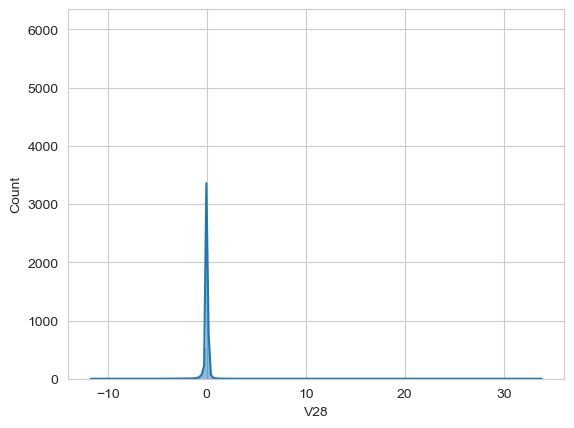

 Min: 0.0 Max: 19656.53 
 mean: 88.64351259533392 std: 247.40050017377052 
 median: 22.0 
 mode: 1.0


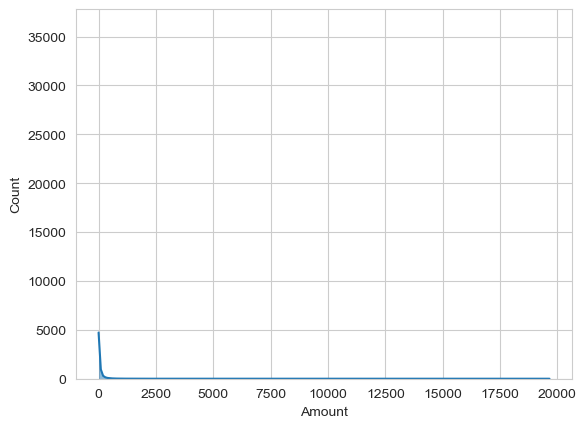

In [23]:
columns = X_train.columns
for col in columns:
    print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(x=X_train[col],kde=True) # right skewed with alot outliers
    plt.show()

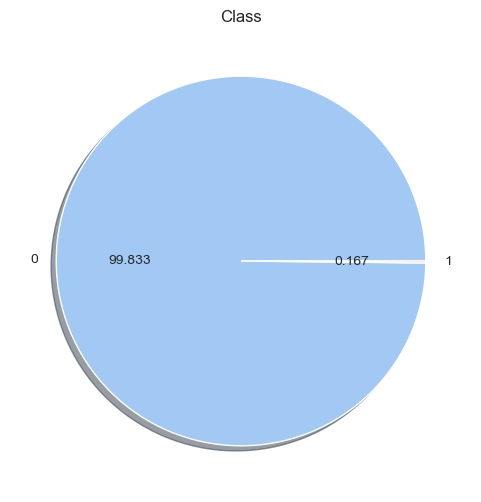

In [24]:

categorical_feat = ['Class']
colors = sns.color_palette('pastel')[0:5]
for col in categorical_feat:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    plt.pie(df[col].value_counts(),colors=colors,
            labels=y_train[col].unique(),shadow=True,
            autopct='%.3f')
    plt.show()

In [25]:
y_train.value_counts()

Class
0        203941
1           341
dtype: int64

In [26]:
target.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [28]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 14)

X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

In [29]:
X_train_3.shape, y_train_3.shape

((407882, 30), (407882, 1))

In [30]:
y_train_3.value_counts()

Class
0        203941
1        203941
dtype: int64

<Axes: >

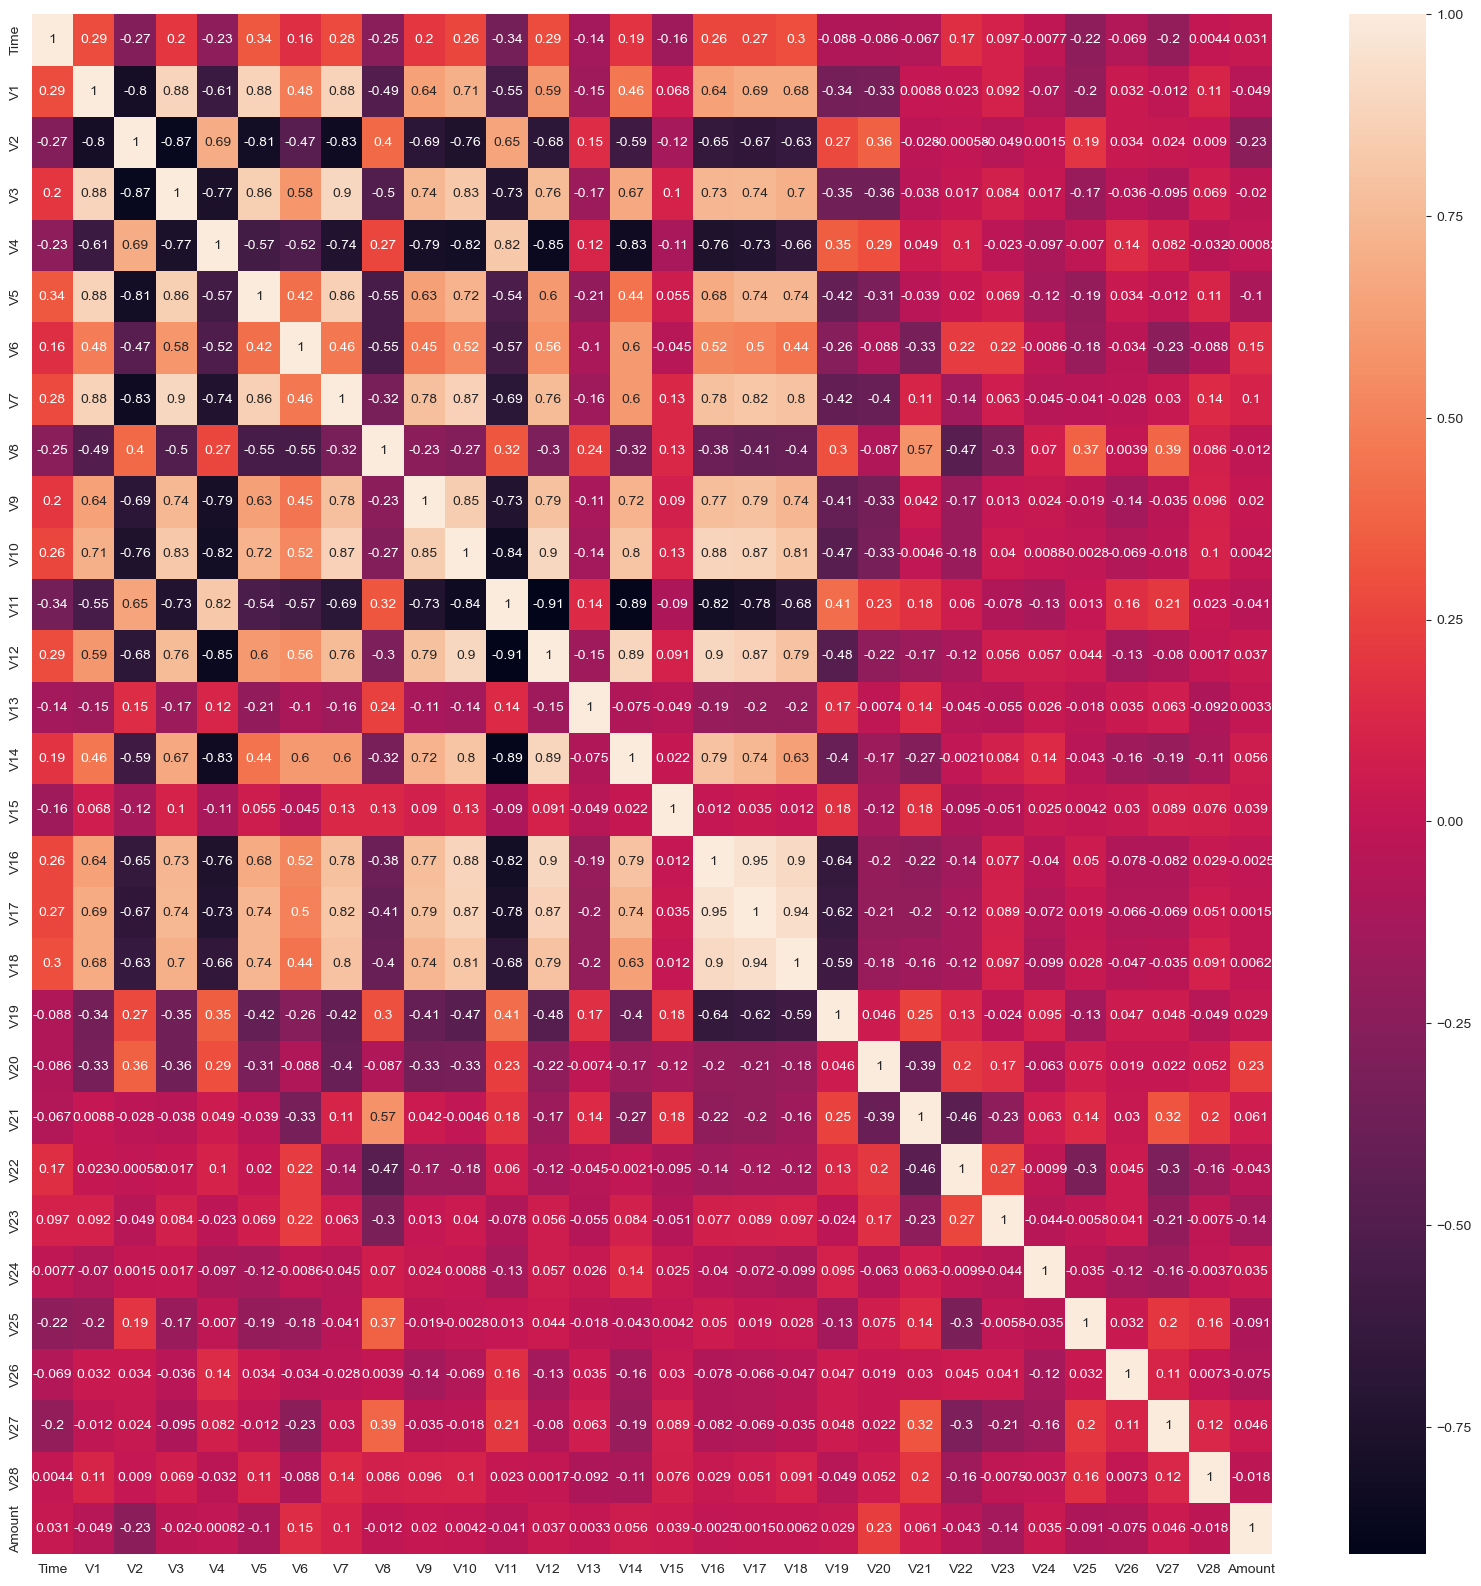

In [31]:
##Bivariate Analysis
X_train=X_train_3
y_train=y_train_3
plt.figure(figsize=(20, 20))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True)

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
minmax_scale = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = minmax_scale.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = minmax_scale.transform(X_test)

# Convert the scaled data back to dataframes
X_train= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the scaled training data
X_train.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,...,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000,407882.000000
mean,0.510315,0.918717,0.786043,0.700644,0.352915,0.527966,0.520957,0.508808,0.728510,0.416658,...,0.418266,0.508928,0.569418,0.618702,0.406565,0.538725,0.427938,0.672658,0.258132,0.004850
std,0.283468,0.090350,0.036429,0.140170,0.138146,0.053184,0.033126,0.064511,0.051394,0.073637,...,0.013799,0.032613,0.043442,0.014912,0.078369,0.038532,0.070506,0.024340,0.008751,0.010996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258467,0.910986,0.766067,0.664800,0.249233,0.526620,0.503921,0.504275,0.715559,0.383559,...,0.412666,0.499779,0.541914,0.615537,0.358232,0.518008,0.381148,0.667593,0.255930,0.000193
50%,0.464697,0.944369,0.777694,0.748272,0.315718,0.542400,0.522711,0.532466,0.720619,0.433103,...,0.416021,0.506769,0.569408,0.618846,0.413209,0.539519,0.422456,0.671321,0.257943,0.001351
75%,0.789283,0.971950,0.796486,0.788656,0.442325,0.553582,0.537001,0.543978,0.730162,0.463653,...,0.422007,0.516977,0.594855,0.622434,0.464000,0.559949,0.472985,0.682173,0.261641,0.005087
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
def classification_result(name,y_test, y_pred, prob, plot_roc=True, plot_cm=True):
    # Calculate and print classification metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f'Test Accuracy: {acc * 100:.2f}%')
    print(f'F1 score: {f1:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
# Plot confusion matrix
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'fontsize': 16})
        plt.xlabel('Predicted', fontsize=16)
        plt.ylabel('Actual', fontsize=16)
        plt.xticks([0.5, 1.5], ['Transaction', 'Fraud'], fontsize=12)
        plt.yticks([0.5, 1.5], ['Transaction', 'Fraud'], fontsize=12)
        plt.title(f'Confusion Matrix for {name} \n Predicted vs Actual', fontname='Arial', fontsize=20, pad=10)
        plt.show()
        plt.title(f'Confusion Matrix for {name} \n Predicted vs Actual', fontname='Arial', fontsize=20, pad=10)
        plt.show()
# Plot ROC curve if desired
    if plot_roc:
        fpr, tpr, thresholds = roc_curve(y_test, prob)
        auc_value = auc(fpr, tpr)
        plt.plot(fpr, tpr, 'g-', label=f'AUC = {auc_value:.2f}')
        plt.grid()
        plt.legend(loc='lower right')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.title('Receiver Operating Characteristic')
        plt.show()

Test Accuracy: 99.75%
F1 score: 0.5103
Recall: 0.7872
Precision: 0.3776
Mean Absolute Error: 0.0025
Mean Squared Error: 0.0025


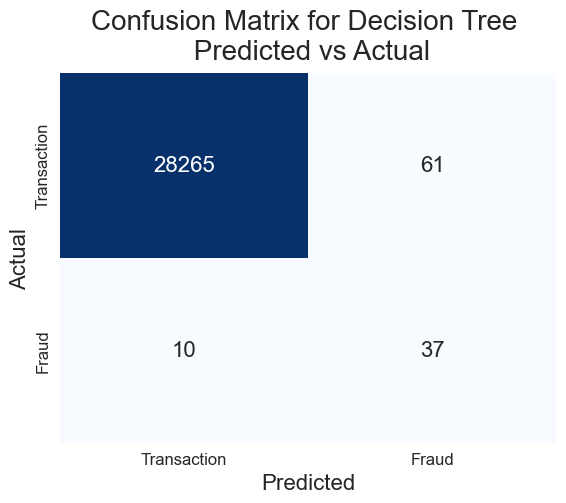

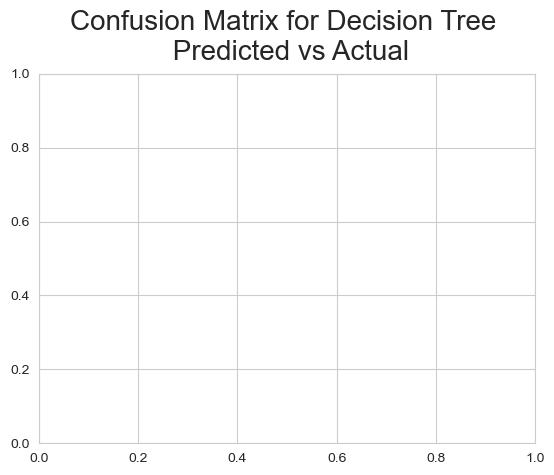

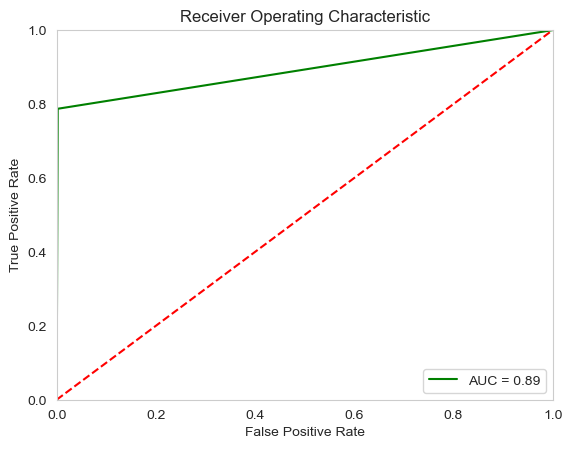

In [39]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
y_pred_prob = DT_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('Decision Tree',y_test, y_pred, prob)

Test Accuracy: 99.95%
F1 score: 0.8602
Recall: 0.8511
Precision: 0.8696
Mean Absolute Error: 0.0005
Mean Squared Error: 0.0005


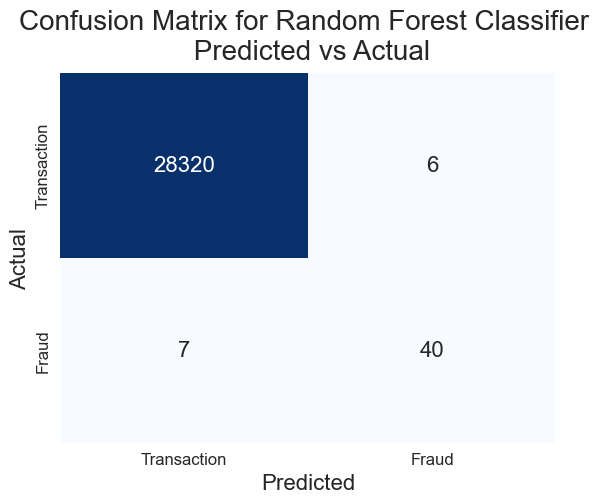

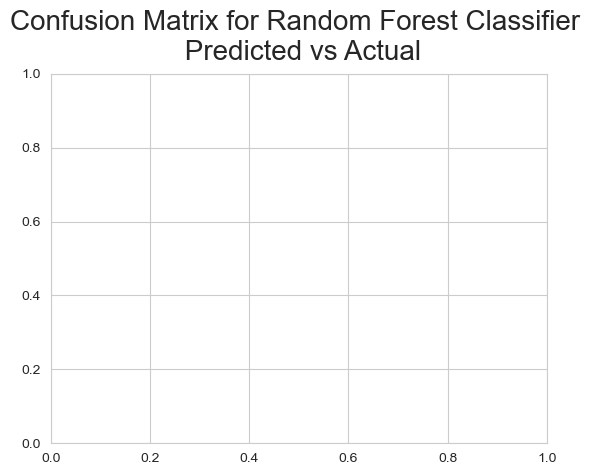

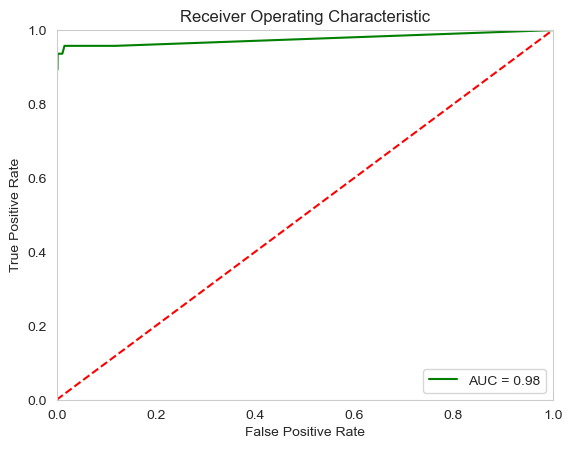

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('Random Forest Classifier',y_test, y_pred, prob)

Test Accuracy: 99.10%
F1 score: 0.2478
Recall: 0.8936
Precision: 0.1438
Mean Absolute Error: 0.0090
Mean Squared Error: 0.0090


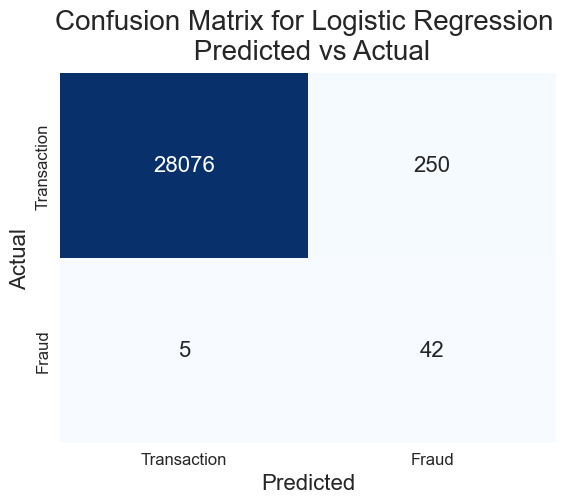

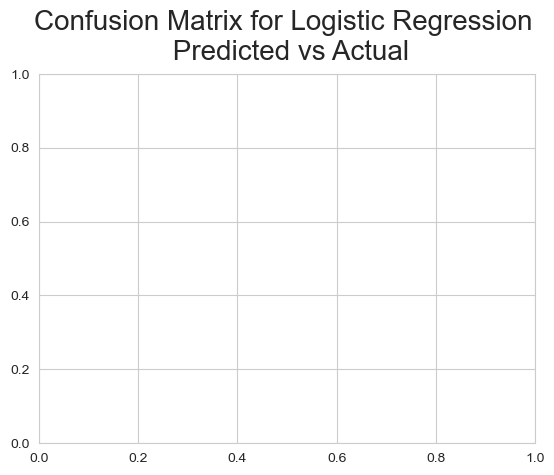

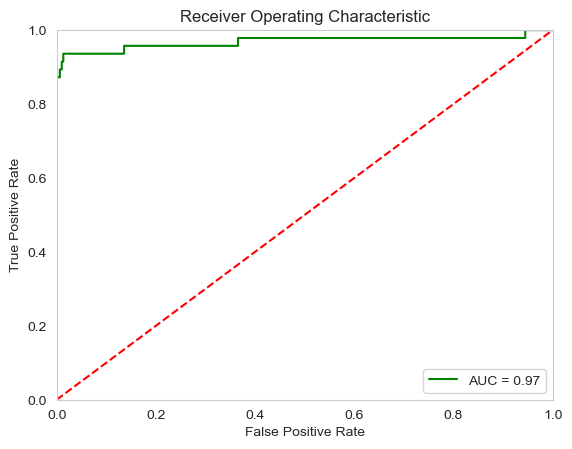

In [41]:
logestic_model = LogisticRegression()
logestic_model.fit(X_train, y_train)
y_pred = logestic_model.predict(X_test)
y_pred_prob = logestic_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('Logistic Regression',y_test, y_pred, prob, plot_roc=True)